In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./test.csv')
df.head(8)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry


In [3]:
df.tail(8)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4269,9263_01,Earth,True,G/1495/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Loisey Heney
4270,9265_01,Mars,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0,Toate Cure
4271,9266_01,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,Danna Peter
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [5]:
df['RoomService'].fillna(df['RoomService'].median(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].median(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].median(), inplace=True)
df['Spa'].fillna(df['Spa'].median(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].median(), inplace=True)
df.isna().sum()


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [6]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     2263
Europa    1002
Mars       925
Name: count, dtype: int64

In [49]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: count, dtype: int64

In [50]:
def cabin_decom(cabstr):
    if(type(cabstr) == float): 
        return np.nan, np.nan, np.nan
    parts = cabstr.split('/')
    return parts[0], parts[1], parts[2]

Funcion para decomponer el string de 'Cabin' en 3 datos mas

In [51]:
deck = [None for _ in range(len(df))]
num = [None for _ in range(len(df))]
side = [None for _ in range(len(df))] 
for index, i in df.iterrows():
    deck[index], num[index], side[index] = cabin_decom(df['Cabin'][index])

df['Deck'] = deck
df['Num'] = num
df['Side'] = side
df.drop(columns=['Cabin'], inplace=True)

In [52]:
df.head(8)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
5,0027_01,Earth,False,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,F,7,P
6,0029_01,Europa,True,55 Cancri e,21.0,False,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,B,2,P
7,0032_01,Europa,True,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0,S


In [53]:
earth_rows = df['HomePlanet'] == 'Earth'
earth_df = df[earth_rows].copy()
earth_df['Deck'].fillna(earth_df['Deck'].mode()[0], inplace=True)
earth_df['Num'].fillna(earth_df['Num'].mode()[0], inplace=True)
earth_df['Side'].fillna(earth_df['Side'].mode()[0], inplace=True)
df.update(earth_df)
df.isna().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Destination     92
Age             91
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck            39
Num             39
Side            39
dtype: int64

In [54]:
earth_rows = df['HomePlanet'] == 'Europa'
earth_df = df[earth_rows].copy()
earth_df['Deck'].fillna(earth_df['Deck'].mode()[0], inplace=True)
earth_df['Num'].fillna(earth_df['Num'].mode()[0], inplace=True)
earth_df['Side'].fillna(earth_df['Side'].mode()[0], inplace=True)
df.update(earth_df)
df.isna().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Destination     92
Age             91
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck            21
Num             21
Side            21
dtype: int64

In [55]:
earth_rows = df['HomePlanet'] == 'Mars'
earth_df = df[earth_rows].copy()
earth_df['Deck'].fillna(earth_df['Deck'].mode()[0], inplace=True)
earth_df['Num'].fillna(earth_df['Num'].mode()[0], inplace=True)
earth_df['Side'].fillna(earth_df['Side'].mode()[0], inplace=True)
df.update(earth_df)
df.isna().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Destination     92
Age             91
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             1
Num              1
Side             1
dtype: int64

In [56]:
df['Deck'].fillna(df['Deck'].mode()[0], inplace=True)
df['Num'].fillna(df['Num'].mode()[0], inplace=True)
df['Side'].fillna(df['Side'].mode()[0], inplace=True)
df.isna().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Destination     92
Age             91
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

In [57]:
earthlings =['G', 'E']
martians = ['F', 'D']
europans = ['B', 'C', 'A', 'T']

In [58]:
for i, row in df.iterrows():
    if(type(df['HomePlanet'][i]) == float):
        if(df['Deck'][i] in earthlings):
            df.loc[i, 'HomePlanet'] = 'Earth'
        elif(df['Deck'][i] in martians):
            df.loc[i, 'HomePlanet'] = 'Mars'
        elif(df['Deck'][i] in europans):
            df.loc[i, 'HomePlanet'] = 'Europa'

df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep       93
Destination     92
Age             91
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

In [59]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

In [60]:
df[df['Name'].isnull()]


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
19,0047_03,Europa,False,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN,B,0,S
114,0262_01,Earth,False,TRAPPIST-1e,20.0,False,186.0,0.0,0.0,602.0,100.0,NaN,G,39,S
140,0308_01,Earth,True,PSO J318.5-22,12.0,False,0.0,0.0,0.0,0.0,0.0,NaN,G,48,P
164,0344_02,Europa,False,55 Cancri e,54.0,False,0.0,8.0,4391.0,4882.0,7.0,NaN,C,8,P
181,0366_01,Earth,True,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,0.0,NaN,G,52,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,8435_01,Mars,False,TRAPPIST-1e,19.0,False,162.0,11.0,0.0,0.0,1216.0,NaN,F,1730,P
4045,8800_01,Earth,True,TRAPPIST-1e,3.0,False,0.0,0.0,0.0,0.0,0.0,NaN,G,1423,P
4056,8810_01,Mars,False,TRAPPIST-1e,45.0,True,1233.0,0.0,0.0,99.0,3.0,NaN,F,1709,S
4074,8873_02,Europa,False,TRAPPIST-1e,36.0,False,0.0,3973.0,18.0,5188.0,543.0,NaN,A,93,P


In [61]:
df['Cabin_region1']=(df['Num'].astype(int) <300)
df['Cabin_region2']=((df['Num'].astype(int)>=300) & (df['Num'].astype(int)<600))
df['Cabin_region3']=((df['Num'].astype(int)>=600) & (df['Num'].astype(int)<900))
df['Cabin_region4']=((df['Num'].astype(int)>=900) & (df['Num'].astype(int)<1200))
df['Cabin_region5']=((df['Num'].astype(int)>=1200) & (df['Num'].astype(int)<1500))
df['Cabin_region6']=((df['Num'].astype(int)>=1500) & (df['Num'].astype(int)<1800))
df['Cabin_region7']=(df['Num'].astype(int)>=1800)

In [62]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Deck,Num,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,...,G,3,S,True,False,False,False,False,False,False
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,...,F,4,S,True,False,False,False,False,False,False
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,...,C,0,S,True,False,False,False,False,False,False
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,...,C,1,S,True,False,False,False,False,False,False
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,...,F,5,S,True,False,False,False,False,False,False


In [63]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
Deck              0
Num               0
Side              0
Cabin_region1     0
Cabin_region2     0
Cabin_region3     0
Cabin_region4     0
Cabin_region5     0
Cabin_region6     0
Cabin_region7     0
dtype: int64

In [64]:
df.drop(columns=['Name'], inplace=True)

In [65]:
def id_decom(cabstr):
    if(type(cabstr) == float): 
        return np.nan, np.nan, np.nan
    parts = cabstr.split('_')
    return parts[0], parts[1]

In [66]:
group = [None for _ in range(len(df))]
idg = [None for _ in range(len(df))]
for index, i in df.iterrows():
    group[index], idg[index] = id_decom(df['PassengerId'][index])

df['Group'] = group
df['Idg'] = idg
#df.drop(columns=['PassengerId'], inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Group,Idg
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,...,S,True,False,False,False,False,False,False,0013,01
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,...,S,True,False,False,False,False,False,False,0018,01
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,...,S,True,False,False,False,False,False,False,0019,01
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,...,S,True,False,False,False,False,False,False,0021,01
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,...,S,True,False,False,False,False,False,False,0023,01


In [67]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df['Expenditure']=df[exp_feats].sum(axis=1)
df['No_spending']=(df['Expenditure']==0).astype(int)

In [68]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth': 1, 'Mars': 2, 'Europa':3})
df['HomePlanet'].head(10)

0    1
1    1
2    3
3    3
4    1
5    1
6    3
7    3
8    3
9    1
Name: HomePlanet, dtype: int64

In [69]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e': 1, 'PSO J318.5-22':2})
df['Destination'].head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    1
9    1
Name: Destination, dtype: int64

In [70]:
df['Group_size']=df['Group'].map(lambda x: df['Group'].value_counts()[x])

In [71]:
df['Solo']=(df['Group_size']==1).astype(int)

In [72]:
df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Deck             0
Num              0
Side             0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Group            0
Idg              0
Expenditure      0
No_spending      0
Group_size       0
Solo             0
dtype: int64

In [73]:
df.drop(columns=['Group', 'Group_size', 'Num'], inplace=True)

In [74]:
df['Deck'] = df['Deck'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7, })
df['Side'] = df['Side'].map({'S':0, 'P':1})
df.drop(columns=['Idg', 'VIP'], inplace=True)


In [75]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Expenditure,No_spending,Solo
0,0013_01,1,True,0,27.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,0.0,1,1
1,0018_01,1,False,0,19.0,0.0,9.0,0.0,2823.0,0.0,...,True,False,False,False,False,False,False,2832.0,0,1
2,0019_01,3,True,1,31.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,0.0,1,1
3,0021_01,3,False,0,38.0,0.0,6652.0,0.0,181.0,585.0,...,True,False,False,False,False,False,False,7418.0,0,1
4,0023_01,1,False,0,20.0,10.0,0.0,635.0,0.0,0.0,...,True,False,False,False,False,False,False,645.0,0,1
5,0027_01,1,False,0,31.0,0.0,1615.0,263.0,113.0,60.0,...,True,False,False,False,False,False,False,2051.0,0,1
6,0029_01,3,True,1,21.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,0.0,1,1
7,0032_01,3,True,0,20.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,0.0,1,0
8,0032_02,3,True,1,23.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,0.0,1,0
9,0033_01,1,False,1,24.0,0.0,639.0,0.0,0.0,0.0,...,True,False,False,False,False,False,False,639.0,0,1


In [76]:
df['UnderAge'] = (df['Age'].astype(int) <= 18)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Expenditure,No_spending,Solo,UnderAge
0,0013_01,1,True,0,27.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,0.0,1,1,False
1,0018_01,1,False,0,19.0,0.0,9.0,0.0,2823.0,0.0,...,False,False,False,False,False,False,2832.0,0,1,False
2,0019_01,3,True,1,31.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,0.0,1,1,False
3,0021_01,3,False,0,38.0,0.0,6652.0,0.0,181.0,585.0,...,False,False,False,False,False,False,7418.0,0,1,False
4,0023_01,1,False,0,20.0,10.0,0.0,635.0,0.0,0.0,...,False,False,False,False,False,False,645.0,0,1,False


In [77]:
#df.drop(columns=['Age'], inplace=True)

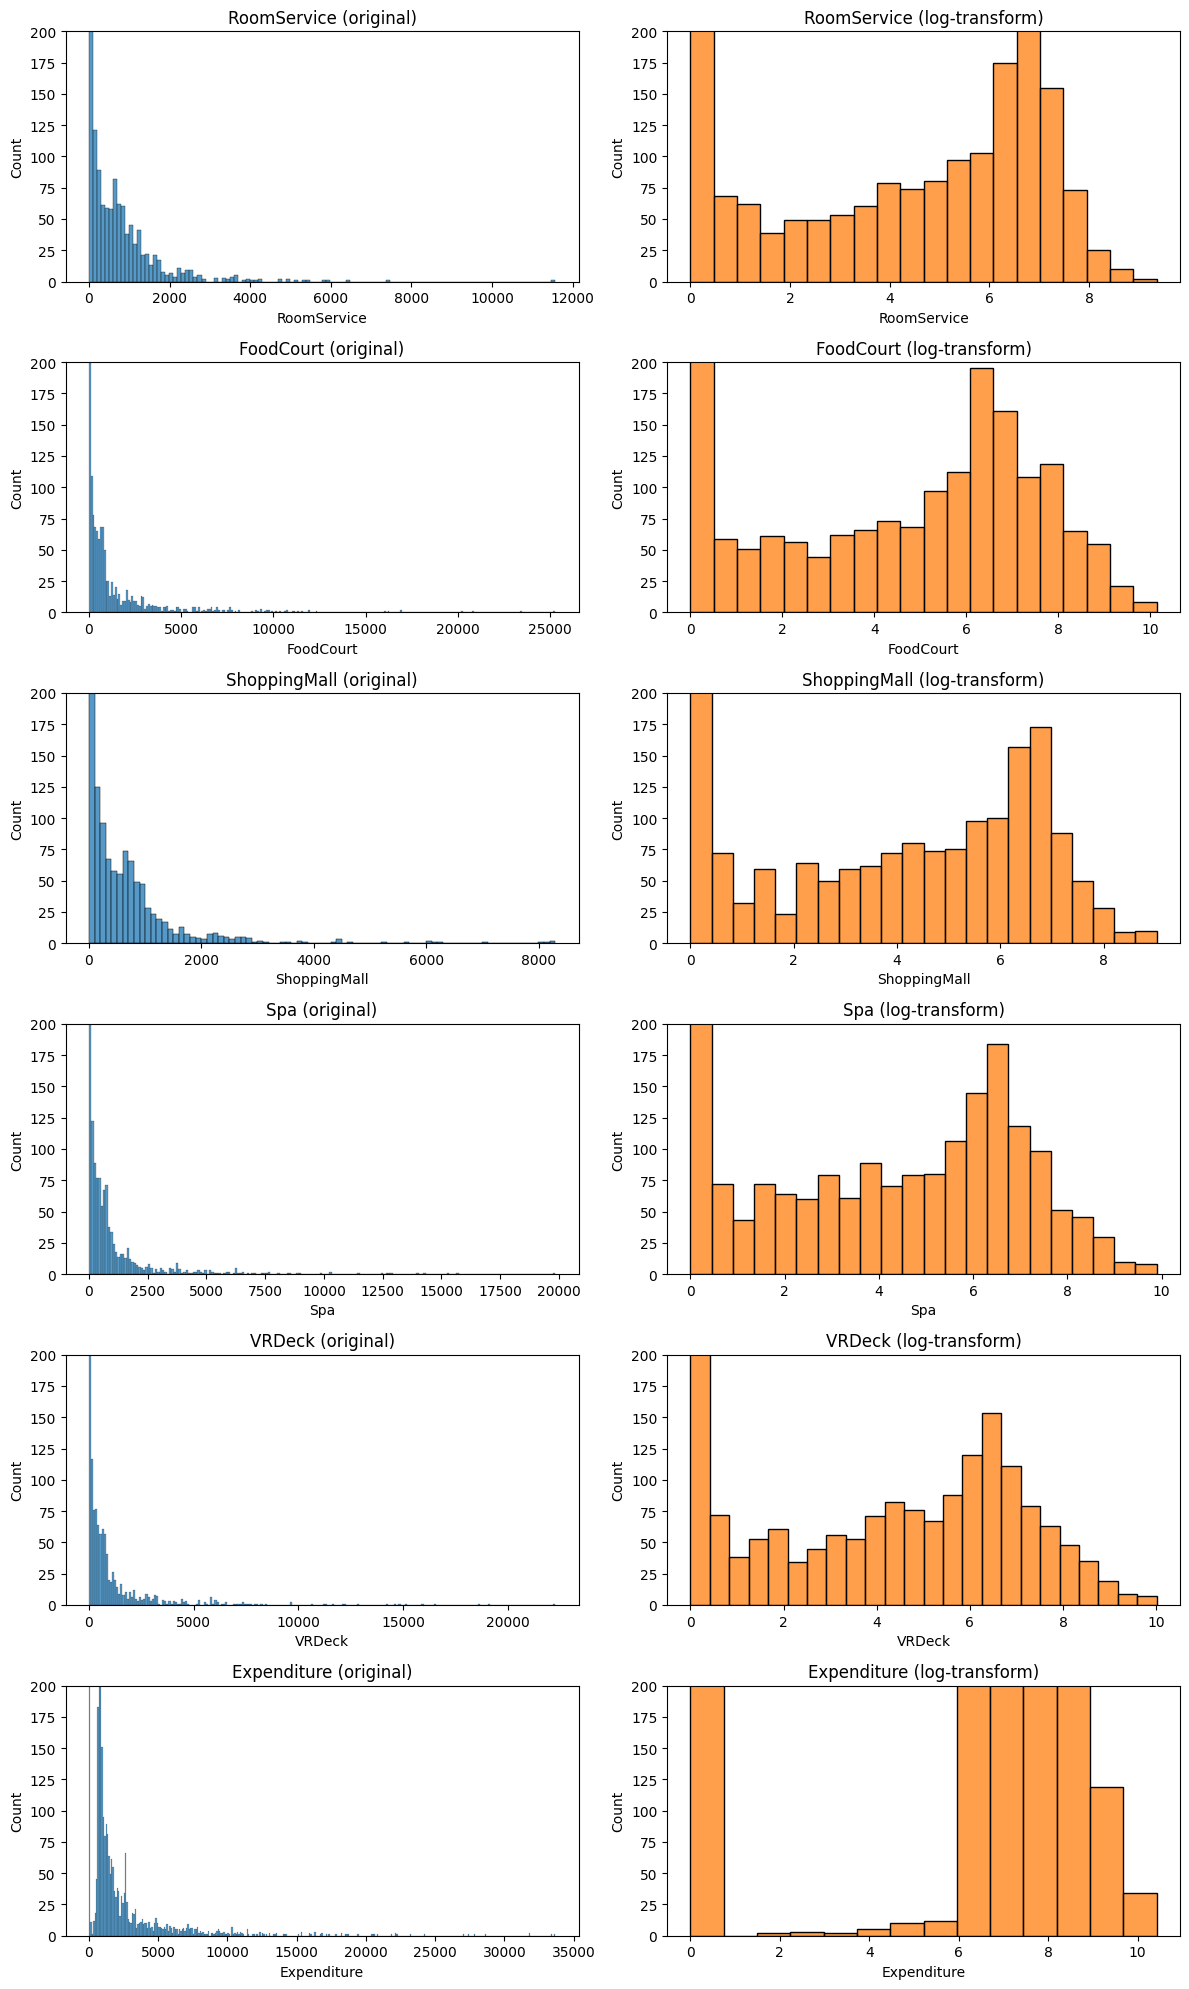

In [78]:
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(df[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+df[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [79]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    df[col]=np.log(1+df[col])
    df[col]=np.log(1+df[col])

In [38]:
df.corr()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,...,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7,Expenditure,No_spending,Solo,UnderAge
HomePlanet,1.000000,0.134647,-0.031594,0.243240,-0.090582,0.141521,-0.110150,0.092088,0.107701,-0.858512,...,-0.105983,-0.211298,-0.210426,-0.222366,-0.089715,-0.023035,-0.065429,0.107294,-0.279885,-0.199092
CryoSleep,0.134647,1.000000,0.123894,-0.049297,-0.517539,-0.521349,-0.507309,-0.539798,-0.507096,-0.002914,...,-0.042047,0.000553,0.032541,0.017722,-0.087832,-0.014100,-0.876956,0.880030,-0.092654,0.088444
Destination,-0.031594,0.123894,1.000000,-0.013859,-0.106384,-0.032443,-0.092441,-0.023863,-0.028712,-0.000222,...,-0.028402,0.000171,0.038947,0.023124,-0.025741,-0.020717,-0.102222,0.103403,0.013332,0.013918
Age,0.243240,-0.049297,-0.013859,1.000000,0.079638,0.158494,0.068145,0.167714,0.155529,-0.245640,...,0.002198,-0.067374,-0.071607,-0.077625,-0.029848,-0.004059,0.193537,-0.186539,0.115302,-0.628339
RoomService,-0.090582,-0.517539,-0.106384,0.079638,1.000000,0.160195,0.418950,0.228062,0.177337,0.056068,...,0.033744,-0.005202,-0.019512,-0.016090,0.086405,0.032796,0.585771,-0.588093,0.091907,-0.109693
FoodCourt,0.141521,-0.521349,-0.032443,0.158494,0.160195,1.000000,0.160696,0.423342,0.475473,-0.228355,...,-0.015389,-0.057349,-0.076731,-0.056123,0.013823,-0.009708,0.613988,-0.592421,0.036989,-0.179845
ShoppingMall,-0.110150,-0.507309,-0.092441,0.068145,0.418950,0.160696,1.000000,0.254298,0.169105,0.067048,...,0.007174,-0.002475,-0.029026,0.000540,0.078170,0.019614,0.572815,-0.576468,0.124692,-0.140197
Spa,0.092088,-0.539798,-0.023863,0.167714,0.228062,0.423342,0.254298,1.000000,0.426115,-0.165342,...,0.012559,-0.043150,-0.056965,-0.047218,0.032370,-0.001988,0.628462,-0.613386,0.058659,-0.184559
VRDeck,0.107701,-0.507096,-0.028712,0.155529,0.177337,0.475473,0.169105,0.426115,1.000000,-0.194568,...,0.019621,-0.028600,-0.058452,-0.066403,0.013159,0.008653,0.593530,-0.576226,0.049596,-0.163631
Deck,-0.858512,-0.002914,-0.000222,-0.245640,0.056068,-0.228355,0.067048,-0.165342,-0.194568,1.000000,...,0.098297,0.232461,0.242224,0.236612,0.092355,0.034788,-0.071683,0.038003,0.233127,0.210338


<Axes: >

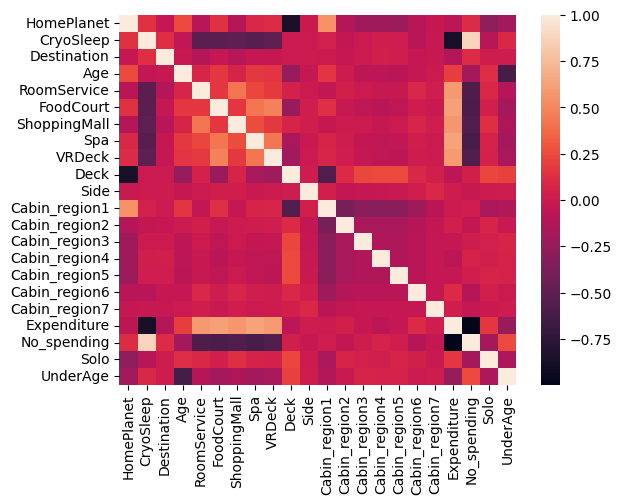

In [39]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Correlation Heatmap')

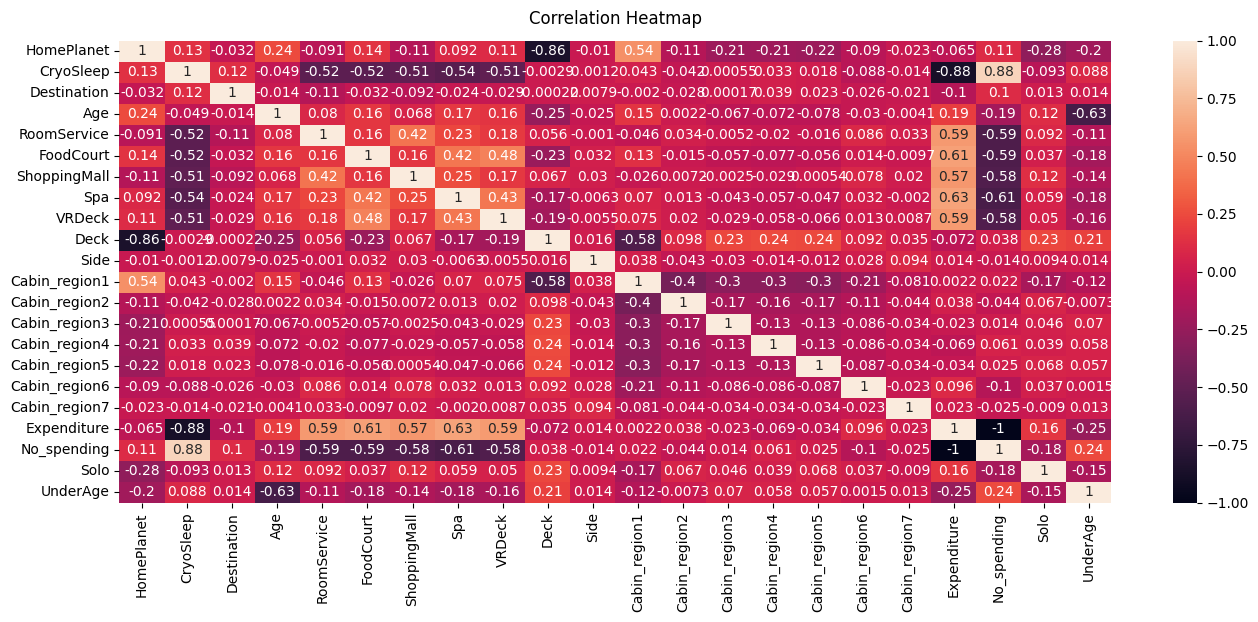

In [40]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [259]:
#df.to_csv('cleandata.csv', sep=',', index=False, encoding='utf-8')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('cleandata.csv')
pre = df.drop(columns=['PassengerId'])
X = data.drop(columns=['Transported'])
y = data['Transported']

model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(pre)

df['Transported'] = y_pred
df[['PassengerId', 'Transported']].to_csv('output.csv', sep=',', index=False, encoding='utf-8')


In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
data = pd.read_csv('cleandata.csv')
X = data.drop(columns=['Transported'])
y = data['Transported']

model = LogisticRegression(multi_class='multinomial')
model.fit(X, y)
y_pred = model.predict(df)

df['Transported'] = y_pred
df[['PassengerId', 'Transported']].to_csv('output.csv', sep=',', index=False, encoding='utf-8')


              precision    recall  f1-score   support

       False       0.76      0.77      0.76      1299
        True       0.77      0.75      0.76      1309

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608



c:\Users\ianjo\miniconda2\envs\py311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
